# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [3]:
#%pip install iso3166
%pip install pycountry

Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [4]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [5]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
#from iso3166 import countries
import pycountry as pc
from datetime import datetime, timedelta

### Notebook Presentation

In [6]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [7]:
df = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [8]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [9]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [10]:
df.isna().values.any()

True

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [11]:
df.drop(df.columns[[0, 1]], axis=1, inplace=True)

In [12]:
df.tail()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


In [13]:
df.shape

(4324, 7)

In [14]:
print(f'Any duplicates? {df.duplicated().values.any()}')

Any duplicates? True


In [15]:
df.drop_duplicates(keep=False,inplace=True)
print(len(df))

4322


## Descriptive Statistics

In [16]:
df.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4322,4322,4322,4322,4322,962,4322
unique,56,137,4318,4277,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Sun Aug 25, 1991 08:40 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3877


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

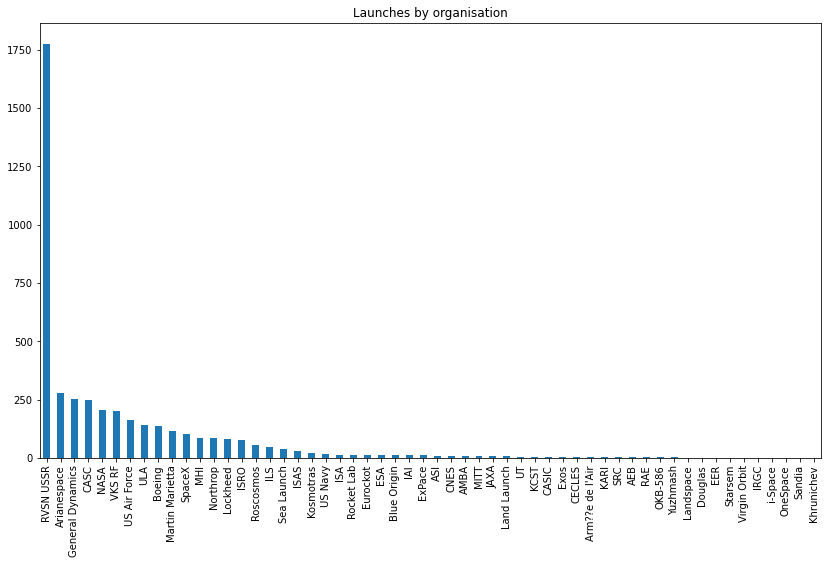

In [17]:
# Plotting using pyplot
ax = df['Organisation'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Launches by organisation")

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [18]:
#df.groupby('Rocket_Status').count()
df.Rocket_Status.value_counts()

StatusRetired    3534
StatusActive      788
Name: Rocket_Status, dtype: int64

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [19]:
df.Mission_Status.value_counts()
#print(type(df))

Success              3877
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [20]:

#clear "nan" values (not cleared with dropna)
#df.Price = df.Price.astype(str).str.replace('Nan', 'NaN')
#df.dropna()

df_cleaned = df[pd.to_numeric(df['Price'], errors='coerce').notnull()]
df_cleaned.shape


(947, 7)

In [21]:
# convert price to number
chars_to_remove = [',', '$']
columns_to_clean = ['Price']
 
for col in columns_to_clean:
    for char in chars_to_remove:
        # Replace each character with an empty string
        df_cleaned[col] = df_cleaned[col].astype(str).str.replace(char, "")
    # Convert column to a numeric data type
    df_cleaned[col] = pd.to_numeric(df_cleaned[col])

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 0 to 4020
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    947 non-null    object 
 1   Location        947 non-null    object 
 2   Date            947 non-null    object 
 3   Detail          947 non-null    object 
 4   Rocket_Status   947 non-null    object 
 5   Price           947 non-null    float64
 6   Mission_Status  947 non-null    object 
dtypes: float64(1), object(6)
memory usage: 59.2+ KB


C:\Users\Acer\AppData\Local\Temp\ipykernel_4136\2006174290.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].astype(str).str.replace(char, "")
C:\Users\Acer\AppData\Local\Temp\ipykernel_4136\2006174290.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_cleaned[col] = df_cleaned[col].astype(str).str.replace(char, "")
C:\Users\Acer\AppData\Local\Temp\ipykernel_4136\2006174290.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [22]:
#df_cleaned.tail()
print(f'Largest value for Price: {df_cleaned.Price.max()}')
print(f'Smallest value for Price: {df_cleaned.Price.min()}')

Largest value for Price: 450.0
Smallest value for Price: 5.3


In [23]:
df_cleaned.describe()

,Price
count,947.00
mean,130.01
std,143.30
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,450.00


In [24]:
# get highest prices
highest_df = df_cleaned.sort_values('Price', ascending=False)
highest_df.head(5)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
834,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Thu Feb 07, 2008 19:45 UTC",Space Shuttle Atlantis | STS-122,StatusRetired,450.00,Success
1131,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 10, 2001 21:10 UTC",Space Shuttle Discovery | STS-105,StatusRetired,450.00,Success
1584,NASA,"LC-39B, Kennedy Space Center, Florida, USA","Fri Mar 04, 1994 13:53 UTC",Space Shuttle Columbia | STS-62,StatusRetired,450.00,Success
1073,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sun Nov 24, 2002 00:49 UTC",Space Shuttle Endeavour | STS-113,StatusRetired,450.00,Success
1580,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sat Apr 09, 1994 11:05 UTC",Space Shuttle Endeavour | STS-59,StatusRetired,450.00,Success


array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

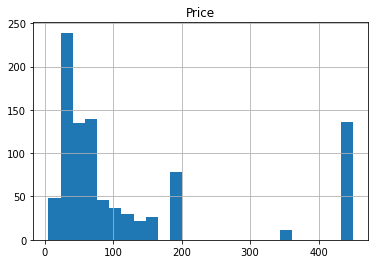

In [25]:
# Plotting using pyplot
df_cleaned.hist(column='Price', bins=25)

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [26]:
df_cleaned['country'] = df_cleaned['Location'].str.split(',').str[-1]
df_cleaned['country'] = df_cleaned['country'].str.strip()
df_cleaned.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_4136\2304304545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['country'] = df_cleaned['Location'].str.split(',').str[-1]
C:\Users\Acer\AppData\Local\Temp\ipykernel_4136\2304304545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['country'] = df_cleaned['country'].str.strip()


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China


In [27]:
df_cleaned['len_country'] = df_cleaned['country'].str.len()
del df_cleaned['len_country'] 
df_cleaned.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_4136\691636636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['len_country'] = df_cleaned['country'].str.len()


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China


In [28]:
df_russia = df_cleaned[df_cleaned['country'].str.contains("Russia")] 
df_russia.shape

(54, 8)

In [29]:
di = {
"Russia": "Russian Federation",
"New Mexico": "USA",
"Yellow Sea": "China",
"Shahrud Missile Test Site": "Iran",
"Pacific Missile Range Facility": "USA",
"Barents Sea": "Russian Federation",
"Gran Canaria": "USA",
}
df_cleaned = df_cleaned.replace({"country": di})
df_cleaned.head()


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China


In [43]:
# check
df_russia = df_cleaned[df_cleaned['country'] == "Russia"] 
df_russia.shape

(477, 9)

In [38]:
# convert to iso country code
df_cleaned['country_iso3'] = [pc.countries.lookup(x).alpha_3 for x in df_cleaned['country']]
df_cleaned.head()


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,country_iso3
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China,CHN


# Use a Choropleth Map to Show the Number of Failures by Country


In [60]:
df_failures = df_cleaned.groupby(['country', 'country_iso3'])['Mission_Status'].apply(lambda x: x[x == 'Failure'].count()).reset_index(name='count')
df_failures.sort_values(by=['count'], inplace=True, ascending=False)
df_failures.head()

,country,country_iso3,count
7,USA,USA,20
2,India,IND,5
0,China,CHN,4
1,France,FRA,2
4,Kazakhstan,KAZ,2


In [56]:
# check
rslt_df = df_cleaned[(df_cleaned['Mission_Status'] == "Failure") & (df_cleaned['country'] == "China")]
rslt_df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,country_iso3
11,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Fri Jul 10, 2020 04:17 UTC","Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2",StatusActive,28.30,Failure,China,CHN
36,CASC,"LC-2, Xichang Satellite Launch Center, China","Thu Apr 09, 2020 11:46 UTC",Long March 3B/E | Nusantara Dua,StatusActive,29.15,Failure,China,CHN
137,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Wed May 22, 2019 22:55 UTC",Long March 4C | Yaogan Weixing-33,StatusActive,64.68,Failure,China,CHN
414,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Wed Aug 31, 2016 18:50 UTC",Long March 4C | Gaofen-10,StatusActive,64.68,Failure,China,CHN


In [61]:
world_map = px.choropleth(df_failures,
                          locations='country_iso3',
                          color='count', 
                          hover_name='country', 
                          color_continuous_scale=px.colors.sequential.matter)
 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [63]:
country_org_status = df_cleaned.groupby(by=['country', 
                                       'Organisation', 
                                       'Mission_Status'], as_index=False).agg({'Detail': pd.Series.count})
 
country_city_org = country_org_status.sort_values('Detail', ascending=False)
country_city_org.head()

,country,Organisation,Mission_Status,Detail
2,China,CASC,Success,150
37,USA,NASA,Success,134
47,USA,ULA,Success,97
45,USA,SpaceX,Success,93
6,France,Arianespace,Success,91


In [64]:
burst = px.sunburst(country_org_status, 
                    path=['country', 'Organisation', 'Mission_Status'], 
                    values='Detail',
                    title='Choroplet',
                   )
 
burst.update_layout(xaxis_title='Number of Missions', 
                    yaxis_title='City',
                    coloraxis_showscale=False)
 
burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

# Analyse the Amount of Money Spent by Organisation per Launch

# Chart the Number of Launches per Year

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

## Chart the Total Number of Mission Failures Year on Year.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 